In [1]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/emnist_lwf_final_emnist'

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['stdout-2025-01-24-10-34.txt',
 'stderr-2025-01-24-11-13.txt',
 'args-2025-01-24-09-52.txt',
 'args-2025-01-24-13-14.txt',
 'raw_log-2025-01-24-13-52.txt',
 'stdout-2025-01-24-12-31.txt',
 'raw_log-2025-01-24-09-10.txt',
 'stderr-2025-01-24-10-34.txt',
 'raw_log-2025-01-24-11-53.txt',
 'args-2025-01-24-11-53.txt',
 'stderr-2025-01-24-11-53.txt',
 'raw_log-2025-01-24-12-31.txt',
 'stderr-2025-01-24-13-14.txt',
 'raw_log-2025-01-24-09-52.txt',
 'args-2025-01-24-12-31.txt',
 'stdout-2025-01-24-11-13.txt',
 'stdout-2025-01-24-14-33.txt',
 'raw_log-2025-01-24-14-33.txt',
 'args-2025-01-24-10-34.txt',
 'args-2025-01-24-13-52.txt',
 'raw_log-2025-01-24-13-14.txt',
 'args-2025-01-24-09-10.txt',
 'stderr-2025-01-24-09-10.txt',
 'stdout-2025-01-24-13-14.txt',
 'stdout-2025-01-24-13-52.txt',
 'stderr-2025-01-24-09-52.txt',
 'raw_log-2025-01-24-10-34.txt',
 'stdout-2025-01-24-11-53.txt',
 'args-2025-01-24-11-13.txt',
 'stderr-2025-01-24-14-33.txt',
 'stderr-2025-01-24-13-52.txt',
 'stdout-2025-01

In [3]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [4]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [5]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [6]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [7]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_35026/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

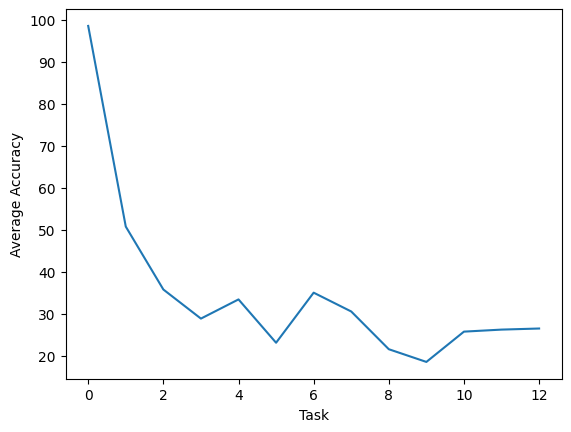

In [8]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [9]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                98.52                 NaN
         1                50.74               95.85
         2                35.76               94.28
         3                28.83               93.27
         4                33.40               81.19
         5                23.08               90.43
         6                35.00               73.95
         7                30.52               77.69
         8                21.54               86.62
         9                18.51               89.00
         10               25.73               79.92
         11               26.21               78.83
         12               26.47               78.06

In [10]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/emnist_ewc_final_emnist'

In [ ]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [12]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [13]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [14]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [15]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

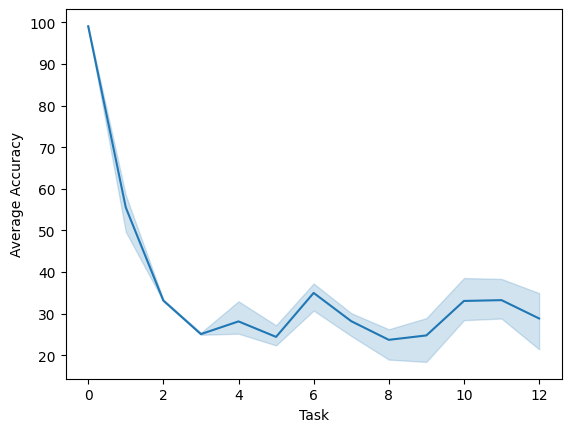

In [16]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [17]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                99.04                 NaN
         1                55.51               87.25
         2                33.13               98.92
         3                25.07               98.83
         4                28.12               88.24
         5                24.40               89.22
         6                34.97               74.35
         7                28.18               80.68
         8                23.69               84.49
         9                24.75               82.33
         10               33.04               72.13
         11               33.23               71.40
         12               28.83               75.74

In [18]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/emnist_lwm_final_emnist'

In [19]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['args-2025-01-24-15-36.txt',
 'stdout-2025-01-24-17-35.txt',
 'args-2025-01-24-15-15.txt',
 'raw_log-2025-01-24-17-15.txt',
 'stdout-2025-01-24-16-52.txt',
 'stdout-2025-01-24-17-15.txt',
 'raw_log-2025-01-24-15-36.txt',
 'stdout-2025-01-24-16-31.txt',
 'stderr-2025-01-24-17-57.txt',
 'raw_log-2025-01-24-16-52.txt',
 'args-2025-01-24-17-57.txt',
 'stderr-2025-01-24-17-15.txt',
 'stderr-2025-01-24-15-15.txt',
 'args-2025-01-24-16-52.txt',
 'stderr-2025-01-24-16-15.txt',
 'raw_log-2025-01-24-16-31.txt',
 'args-2025-01-24-16-15.txt',
 'raw_log-2025-01-24-17-35.txt',
 'stdout-2025-01-24-15-36.txt',
 'stderr-2025-01-24-17-35.txt',
 'stderr-2025-01-24-16-52.txt',
 'args-2025-01-24-16-31.txt',
 'args-2025-01-24-15-54.txt',
 'raw_log-2025-01-24-15-15.txt',
 'raw_log-2025-01-24-17-57.txt',
 'stderr-2025-01-24-15-36.txt',
 'args-2025-01-24-17-15.txt',
 'raw_log-2025-01-24-16-15.txt',
 'stderr-2025-01-24-16-31.txt',
 'args-2025-01-24-17-35.txt',
 'stdout-2025-01-24-15-15.txt',
 'raw_log-2025-01-

In [20]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [21]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [22]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [23]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [24]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

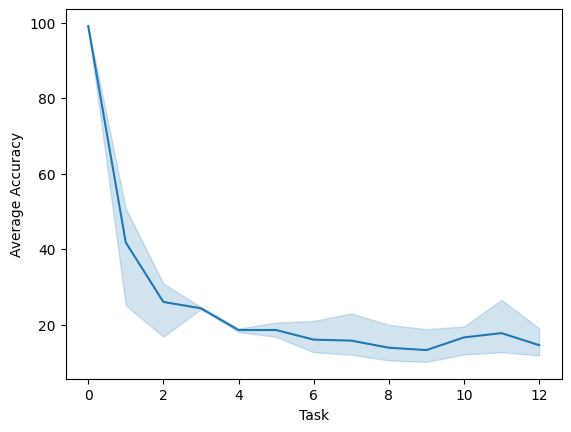

In [25]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [26]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                99.08                 NaN
         1                41.74               98.21
         2                25.99               90.83
         3                24.30               86.54
         4                18.55               89.12
         5                18.54               87.36
         6                15.99               87.61
         7                15.74               87.07
         8                13.85               88.53
         9                13.22               88.88
         10               16.58               84.56
         11               17.72               83.16
         12               14.53               86.48

In [27]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/emnist_icarl_final_emnist'

In [28]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['stderr-2025-01-21-01-09.txt',
 'stderr-2025-01-21-00-33.txt',
 'raw_log-2025-01-21-01-48.txt',
 'args-2025-01-20-23-57.txt',
 'stdout-2025-01-20-22-49.txt',
 'args-2025-01-21-02-29.txt',
 'raw_log-2025-01-21-02-29.txt',
 'stdout-2025-01-20-23-21.txt',
 'stdout-2025-01-20-21-42.txt',
 'raw_log-2025-01-20-22-14.txt',
 'raw_log-2025-01-20-22-49.txt',
 'raw_log-2025-01-21-01-09.txt',
 'stderr-2025-01-20-21-42.txt',
 'args-2025-01-20-22-14.txt',
 'stderr-2025-01-20-23-21.txt',
 'args-2025-01-21-01-48.txt',
 'args-2025-01-20-21-42.txt',
 'stderr-2025-01-20-23-57.txt',
 'stdout-2025-01-21-01-48.txt',
 'raw_log-2025-01-20-21-42.txt',
 'stderr-2025-01-21-01-48.txt',
 'stdout-2025-01-20-22-14.txt',
 'stdout-2025-01-21-02-29.txt',
 'stdout-2025-01-21-00-33.txt',
 'args-2025-01-20-23-21.txt',
 'stderr-2025-01-20-22-14.txt',
 'args-2025-01-21-01-09.txt',
 'args-2025-01-21-00-33.txt',
 'raw_log-2025-01-20-23-57.txt',
 'stdout-2025-01-21-01-09.txt',
 'args-2025-01-20-22-49.txt',
 'stderr-2025-01-20

In [29]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [30]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [31]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [32]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [33]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                98.44                 NaN
         1                85.56               12.98
         2                77.92               15.62
         3                70.34               19.02
         4                67.27               19.79
         5                62.13               17.78
         6                60.76               19.22
         7                59.59               20.45
         8                58.15               17.71
         9                56.63               17.82
         10               55.73               17.25
         11               56.84               15.72
         12               57.13               14.89

In [35]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/emnist_rere_lrp_final_emnist'

In [36]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stderr-2025-01-25-12-33.txt',
 'stderr-2025-01-24-01-52.txt',
 'stderr-2025-01-27-05-19.txt',
 'args-2025-01-27-05-19.txt',
 'args-2025-01-25-12-33.txt',
 'stdout-2025-01-25-02-23.txt',
 'stdout-2025-01-23-13-17.txt',
 'raw_log-2025-01-26-18-46.txt',
 'args-2025-01-25-22-03.txt',
 'stdout-2025-01-25-22-03.txt',
 'args-2025-01-24-01-52.txt',
 'raw_log-2025-01-24-01-52.txt',
 'stdout-2025-01-27-05-19.txt',
 'args-2025-01-26-18-46.txt',
 'stderr-2025-01-24-14-05.txt',
 'args-2025-01-25-02-23.txt',
 'raw_log-2025-01-27-05-19.txt',
 'stdout-2025-01-26-08-17.txt',
 'raw_log-2025-01-25-02-23.txt',
 'raw_log-2025-01-25-22-03.txt',
 'args-2025-01-24-14-05.txt',
 'stdout-2025-01-24-14-05.txt',
 'stdout-2025-01-24-01-52.txt',
 'raw_log-2025-01-24-14-05.txt',
 'stderr-2025-01-26-08-17.txt',
 'stdout-2025-01-25-12-33.txt',
 'stderr-2025-01-23-13-17.txt',
 'args-2025-01-26-08-17.txt',
 'stderr-2025-01-26-18-46.txt',
 'stdout-2025-01-26-18-46.txt',
 'raw_log-2025-01-26-08-17.txt',
 'raw_log-2025-01

In [37]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [38]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [39]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [40]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [41]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

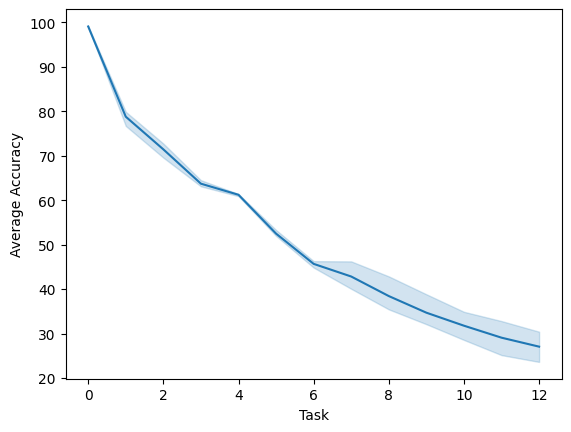

In [42]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [43]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                99.06                 NaN
         1                78.77               17.02
         2                71.42               15.02
         3                63.70               15.23
         4                61.21               15.65
         5                52.47               17.32
         6                45.67               14.55
         7                42.82               11.51
         8                38.43               13.19
         9                34.69               12.33
         10               31.76               11.67
         11               29.07               12.40
         12               27.05               11.94

In [44]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/emnist_joint_final_emnist'

In [45]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-19-17-41.txt',
 'stdout-2025-01-19-21-03.txt',
 'raw_log-2025-01-19-20-29.txt',
 'raw_log-2025-01-19-18-45.txt',
 'stderr-2025-01-19-18-45.txt',
 'raw_log-2025-01-19-21-03.txt',
 'args-2025-01-19-21-03.txt',
 'stdout-2025-01-19-21-59.txt',
 'raw_log-2025-01-19-22-54.txt',
 'stdout-2025-01-19-19-54.txt',
 'stderr-2025-01-19-20-29.txt',
 'raw_log-2025-01-19-17-41.txt',
 'stdout-2025-01-19-22-54.txt',
 'args-2025-01-19-22-54.txt',
 'stdout-2025-01-19-17-41.txt',
 'args-2025-01-19-18-45.txt',
 'raw_log-2025-01-19-19-54.txt',
 'stdout-2025-01-19-19-18.txt',
 'stderr-2025-01-19-19-54.txt',
 'stderr-2025-01-19-22-54.txt',
 'raw_log-2025-01-19-21-59.txt',
 'stderr-2025-01-19-19-18.txt',
 'stdout-2025-01-19-18-13.txt',
 'args-2025-01-19-18-13.txt',
 'stderr-2025-01-19-21-03.txt',
 'stderr-2025-01-19-18-13.txt',
 'raw_log-2025-01-19-19-18.txt',
 'stdout-2025-01-19-20-29.txt',
 'args-2025-01-19-20-29.txt',
 'stderr-2025-01-19-21-59.txt',
 'stdout-2025-01-19-18-45.txt',
 'args-202

In [46]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [47]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [48]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [49]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [12]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [50]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(13)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(13)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in range(13)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_tag" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(13)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_35026/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

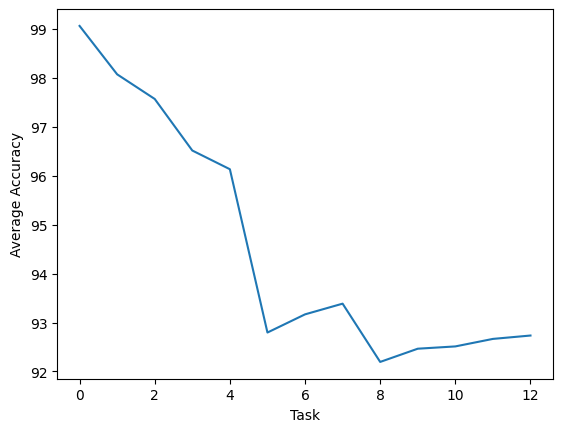

In [51]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [52]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                99.06                 NaN
         1                98.07                0.98
         2                97.57                0.96
         3                96.52                1.25
         4                96.13                0.99
         5                92.80                2.80
         6                93.17                2.50
         7                93.39                2.59
         8                92.19                3.21
         9                92.46                3.00
         10               92.51                2.81
         11               92.66                2.71
         12               92.73                2.59

In [53]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_35026/1325727104.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


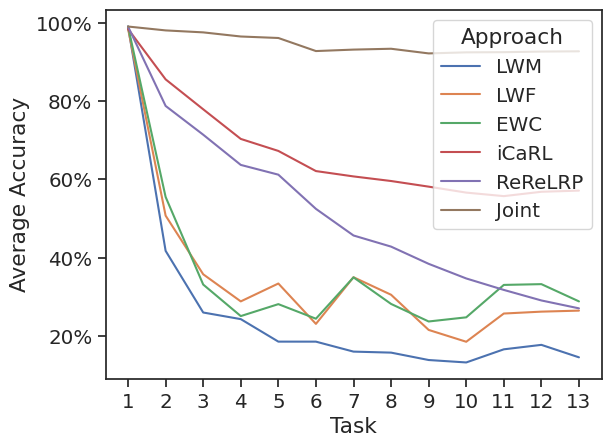

In [54]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(13))
g.set_xticklabels([i+1 for i in range(13)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("emnist.pdf", format='pdf', bbox_inches='tight')